In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image=cv2.imread('data.jpg')
image=cv2.resize(image,(512,512))

In [3]:
image=image.reshape(512*512,3)

In [4]:
X=image
X.shape

(262144, 3)

In [5]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [6]:
import random

In [7]:
def randominit(k):
    centroids=[]
    while len(centroids)<k:
        c=image[random.randint(0,len(image)-1)]
        centroids.append(c)
    return centroids

In [8]:
randominit(3)

[array([205, 186, 161], dtype=uint8),
 array([123, 146, 172], dtype=uint8),
 array([27, 22, 31], dtype=uint8)]

In [9]:
def calc(means,centroids,k):
    for i in range(k):
            all_dist=[distance(X[j],means[i]) for j in range(len(X))]
            dist=np.array(all_dist)
            z=np.argmin(dist)
            centroids[i]=X[z]
    return centroids

In [10]:
def kmeans(k):
    centroids=randominit(k)
    assignments=[0]*len(X)
    for i in range(10):
        for i in range(len(X)):
            distances=np.array([distance(X[i],j) for j in centroids])
            assignments[i]=np.argmin(distances)
        means=[np.mean(X[np.array(assignments)==j],axis=0) for j in range(k)]
        centroids=calc(means,centroids,k)
    return centroids,assignments

In [11]:
centroids,assignments=kmeans(3)

In [12]:
centroids

[array([106, 112, 133], dtype=uint8),
 array([ 95, 103, 125], dtype=uint8),
 array([ 98, 104, 127], dtype=uint8)]

In [13]:
centroids=np.array(centroids,dtype=np.uint8)

In [14]:
centroids

array([[106, 112, 133],
       [ 95, 103, 125],
       [ 98, 104, 127]], dtype=uint8)

In [15]:
def cluster(X,assignments,centroids):
    for i in range(len(X)):
        X[i]=centroids[assignments[i]]
    return X

In [16]:
finalimage=cluster(X,assignments,centroids)

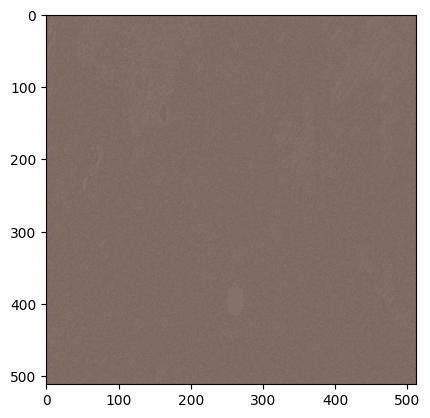

In [17]:
finalimage=cv2.cvtColor(finalimage.reshape(512,512,3),cv2.COLOR_BGR2RGB)
plt.imshow(finalimage)